# **This is 2nd Notebook for the Code**

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid, RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Antoine's Path
df = pd.read_csv('/content/drive/MyDrive/Fall 2023/data 144/Data 144 Final Project/glassdoor_matched.csv')

In [ ]:
#Dina's Path
df = pd.read_csv('/content/drive/MyDrive/Data 144 Final Project/glassdoor_matched.csv')

In [ ]:
#Eric's Path
df = pd.read_csv('/content/drive/MyDrive/Senior Year Classes/DATA 144: Data Mining/Data 144 Final Project/glassdoor_matched.csv')

In [ ]:
#Sanjana's Path
df = pd.read_csv('/content/drive/MyDrive/Data 144 Final Project/cleaned_vaderandcompany_merge.csv')

In [ ]:
#Angela's Path
df = pd.read_csv('/content/drive/MyDrive/Data 144 Final Project/cleaned_vaderandcompany_merge.csv')

In [5]:
df

firm date_review               job_title  \
0       AFH-Wealth-Management  2020-10-01    Office Administrator   
1       AFH-Wealth-Management  2021-02-05         Quality Control   
2       AFH-Wealth-Management  2021-02-07       IFA Administrator   
3       AFH-Wealth-Management  2021-02-07   Investment Operations   
4       AFH-Wealth-Management  2021-03-23          Administrative   
...                       ...         ...                     ...   
124370                   next  2021-06-02      Customer Assistant   
124371                   next  2021-06-02        Warehouse Worker   
124372                   next  2021-06-03         Human Resources   
124373                   next  2021-06-03     Stockroom Assistant   
124374                   next  2021-06-04        Retail Assistant   

                                   current                         location  \
0       Former Employee, more than 3 years     Bromsgrove, England, England   
1                          Former Employee     Birmingham, England, England   
2        Former Employee, less than 1 year     Bromsgrove, England, England   
3        Former Employee, more than 1 year     Birmingham, England, England   
4                          Former Employee                              NaN   
...                                    ...                              ...   
124370   Former Employee, more than 1 year                              NaN   
124371  Former Employee, more than 5 years  South Elmsall, England, England   
124372  Former Employee, more than 3 years      Leicester, England, England   
124373  Former Employee, more than 5 years      Fleetwood, England, England   
124374   Former Employee, more than 1 year        Reading, England, England   

        overall_rating  work_life_balance  culture_values  \
0                    2                  1               3   
1                    1                  3               1   
2                    4                  3               3   
3                    3                  5               5   
4                    1                  5               1   
...                ...                ...             ...   
124370               3                  4               4   
124371               5                  5               5   
124372               4                  4               3   
124373               3                  3               1   
124374               4                  3               3   

        diversity_inclusion  career_opp  ...       domain  year founded  \
0                       1.0           1  ...  afhwm.co.uk        1990.0   
1                       2.0           1  ...  afhwm.co.uk        1990.0   
2                       4.0           4  ...  afhwm.co.uk        1990.0   
3                       4.0           3  ...  afhwm.co.uk        1990.0   
4                       2.0           1  ...  afhwm.co.uk        1990.0   
...                     ...         ...  ...          ...           ...   
124370                  5.0           4  ...      pmcg.ru           NaN   
124371                  5.0           5  ...      pmcg.ru           NaN   
124372                  3.0           3  ...      pmcg.ru           NaN   
124373                  1.0           1  ...      pmcg.ru           NaN   
124374                  3.0           3  ...      pmcg.ru           NaN   

                  industry  size range  \
0       financial services   201 - 500   
1       financial services   201 - 500   
2       financial services   201 - 500   
3       financial services   201 - 500   
4       financial services   201 - 500   
...                    ...         ...   
124370            internet  501 - 1000   
124371            internet  501 - 1000   
124372            internet  501 - 1000   
124373            internet  501 - 1000   
124374            internet  501 - 1000   

                                          locality         country  \
0       bromsgrove, worcestershire, un

In [6]:
df.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons',
       'headline_clean', 'pros_clean', 'cons_clean', 'pros_polarity',
       'cons_polarity', 'headline_polarity', 'firm_normalized', 'Unnamed: 0',
       'name', 'domain', 'year founded', 'industry', 'size range', 'locality',
       'country', 'linkedin url', 'current employee estimate',
       'total employee estimate', 'name_normalized'],
      dtype='object')

# Data Pre-Procesing

In [7]:
df['current employee'] = df['current'].str.contains('Current').astype(int)
df['former employee'] = df['current'].str.contains('Former').astype(int)
df['years of experience'] = df['current'].str.extract(r'(\d+\.\d+|\d+)').fillna('null')
one_hot_encoded = pd.get_dummies(df['years of experience'], prefix='years of experience')
df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop(['current'], axis=1)

In [8]:
# Adding keyword features
interesting_negative_words = ["micromanage", "blame", "unprofessional", "gossip", "disorganization", "favoritism", "insult"]
positive_words = ["listen", "helpful", "gratitude", "nice", "great", "autonomy"]

for word in interesting_negative_words:
  df["headline_contains_" + word] = df["headline"].str.contains(word)
  df["pros_contains_" + word] = df["pros"].str.contains(word)
  df["cons_contains_" + word] = df["cons"].str.contains(word)
  df[word] = (df["headline_contains_" + word] + df["pros_contains_" + word] + df["cons_contains_" + word]) > 0
  df.drop(columns = ["headline_contains_" + word, "pros_contains_" + word, "cons_contains_" + word], inplace = True)

for word in positive_words:
  df["headline_contains_" + word] = df["headline"].str.contains(word)
  df["pros_contains_" + word] = df["pros"].str.contains(word)
  df["cons_contains_" + word] = df["cons"].str.contains(word)
  df[word] = (df["headline_contains_" + word] + df["pros_contains_" + word] + df["cons_contains_" + word]) > 0
  df.drop(columns = ["headline_contains_" + word, "pros_contains_" + word, "cons_contains_" + word], inplace = True)

In [9]:
#industry one hot but only keeping the top 10 and the rest as 'Other'
top_industries = df['industry'].value_counts().nlargest(10).index
df['industry'] = df['industry'].apply(lambda x: x if x in top_industries else 'Other')

industry_encoded = pd.get_dummies(df['industry'], prefix='industry')
df = pd.concat([df, industry_encoded], axis=1)
df = df.drop('industry', axis=1)
df.head(10)

firm date_review                         job_title  \
0  AFH-Wealth-Management  2020-10-01              Office Administrator   
1  AFH-Wealth-Management  2021-02-05                   Quality Control   
2  AFH-Wealth-Management  2021-02-07                 IFA Administrator   
3  AFH-Wealth-Management  2021-02-07             Investment Operations   
4  AFH-Wealth-Management  2021-03-23                    Administrative   
5  AFH-Wealth-Management  2021-04-06                 IFA Administrator   
6  AFH-Wealth-Management  2021-04-17                               IFA   
7  AFH-Wealth-Management  2021-05-12       Client Engagement Executive   
8  AFH-Wealth-Management  2021-05-13          Administrative Assistant   
9  AFH-Wealth-Management  2021-05-13   Mortgage and Protection Advisor   

                       location  overall_rating  work_life_balance  \
0  Bromsgrove, England, England               2                  1   
1  Birmingham, England, England               1                  3   
2  Bromsgrove, England, England               4                  3   
3  Birmingham, England, England               3                  5   
4                           NaN               1                  5   
5  Bromsgrove, England, England               5                  5   
6                           NaN               5                  5   
7  Birmingham, England, England               1                  1   
8   Worcester, England, England               1                  1   
9     Taunton, England, England               5                  5   

   culture_values  diversity_inclusion  career_opp  comp_benefits  ...  \
0               3                  1.0           1              2  ...   
1               1                  2.0           1              1  ...   
2               3                  4.0           4              4  ...   
3               5                  4.0           3              1  ...   
4               1                  2.0           1              2  ...   
5               5                  5.0           3              5  ...   
6               5                  5.0           5              5  ...   
7               2                  1.0           1              1  ...   
8               1                  1.0           1              1  ...   
9               5                  5.0           5              4  ...   

   industry_accounting  industry_computer software  \
0                    0                           0   
1                    0                           0   
2                    0                           0   
3                    0                           0   
4                    0                           0   
5                    0                           0   
6                    0                           0   
7                    0                           0   
8                    0                           0   
9                    0                           0   

   industry_consumer electronics  industry_financial services  \
0                              0                            1   
1                              0                            1   
2                              0                            1   
3                              0                            1   
4                              0                            1   
5                              0                            1   
6                              0                            1   
7                              0                            1   
8                              0                            1   
9                              0                            1   

  industry_hospitality industry_information technology and services  \
0                    0                                            0   
1                    0                                            0   
2                    0                                            0   
3                    0  

In [10]:
#country one hot
top_countries = df['country'].value_counts().nlargest(10).index
df['country'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')
country_encoded = pd.get_dummies(df['country'], prefix='country')
df = pd.concat([df, country_encoded], axis=1)
df = df.drop('country', axis=1)
df.head(10)

firm date_review                         job_title  \
0  AFH-Wealth-Management  2020-10-01              Office Administrator   
1  AFH-Wealth-Management  2021-02-05                   Quality Control   
2  AFH-Wealth-Management  2021-02-07                 IFA Administrator   
3  AFH-Wealth-Management  2021-02-07             Investment Operations   
4  AFH-Wealth-Management  2021-03-23                    Administrative   
5  AFH-Wealth-Management  2021-04-06                 IFA Administrator   
6  AFH-Wealth-Management  2021-04-17                               IFA   
7  AFH-Wealth-Management  2021-05-12       Client Engagement Executive   
8  AFH-Wealth-Management  2021-05-13          Administrative Assistant   
9  AFH-Wealth-Management  2021-05-13   Mortgage and Protection Advisor   

                       location  overall_rating  work_life_balance  \
0  Bromsgrove, England, England               2                  1   
1  Birmingham, England, England               1                  3   
2  Bromsgrove, England, England               4                  3   
3  Birmingham, England, England               3                  5   
4                           NaN               1                  5   
5  Bromsgrove, England, England               5                  5   
6                           NaN               5                  5   
7  Birmingham, England, England               1                  1   
8   Worcester, England, England               1                  1   
9     Taunton, England, England               5                  5   

   culture_values  diversity_inclusion  career_opp  comp_benefits  ...  \
0               3                  1.0           1              2  ...   
1               1                  2.0           1              1  ...   
2               3                  4.0           4              4  ...   
3               5                  4.0           3              1  ...   
4               1                  2.0           1              2  ...   
5               5                  5.0           3              5  ...   
6               5                  5.0           5              5  ...   
7               2                  1.0           1              1  ...   
8               1                  1.0           1              1  ...   
9               5                  5.0           5              4  ...   

   country_belgium  country_denmark  country_france  country_germany  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   
3                0                0               0                0   
4                0                0               0                0   
5                0                0               0                0   
6                0                0               0                0   
7                0                0               0                0   
8                0                0               0                0   
9                0                0               0                0   

  country_ireland country_jordan country_netherlands country_switzerland  \
0               0              0                   0                   0   
1               0              0                   0                   0   
2               0              0                   0                   0   
3               0              0                   0                   0   
4               0              0                   0                   0   
5               0              0                   0                   0   
6               0              0                   0                   0   
7               0              0                   0                   0   
8               0              0                   0                   0   
9               0              0                   0              

In [11]:
#size range one hot
size_range_encoded = pd.get_dummies(df['size range'], prefix='size range')
df = pd.concat([df, size_range_encoded], axis=1)
df = df.drop('size range', axis=1)
df.head(10)

firm date_review                         job_title  \
0  AFH-Wealth-Management  2020-10-01              Office Administrator   
1  AFH-Wealth-Management  2021-02-05                   Quality Control   
2  AFH-Wealth-Management  2021-02-07                 IFA Administrator   
3  AFH-Wealth-Management  2021-02-07             Investment Operations   
4  AFH-Wealth-Management  2021-03-23                    Administrative   
5  AFH-Wealth-Management  2021-04-06                 IFA Administrator   
6  AFH-Wealth-Management  2021-04-17                               IFA   
7  AFH-Wealth-Management  2021-05-12       Client Engagement Executive   
8  AFH-Wealth-Management  2021-05-13          Administrative Assistant   
9  AFH-Wealth-Management  2021-05-13   Mortgage and Protection Advisor   

                       location  overall_rating  work_life_balance  \
0  Bromsgrove, England, England               2                  1   
1  Birmingham, England, England               1                  3   
2  Bromsgrove, England, England               4                  3   
3  Birmingham, England, England               3                  5   
4                           NaN               1                  5   
5  Bromsgrove, England, England               5                  5   
6                           NaN               5                  5   
7  Birmingham, England, England               1                  1   
8   Worcester, England, England               1                  1   
9     Taunton, England, England               5                  5   

   culture_values  diversity_inclusion  career_opp  comp_benefits  ...  \
0               3                  1.0           1              2  ...   
1               1                  2.0           1              1  ...   
2               3                  4.0           4              4  ...   
3               5                  4.0           3              1  ...   
4               1                  2.0           1              2  ...   
5               5                  5.0           3              5  ...   
6               5                  5.0           5              5  ...   
7               2                  1.0           1              1  ...   
8               1                  1.0           1              1  ...   
9               5                  5.0           5              4  ...   

   country_united kingdom  country_united states  size range_1 - 10  \
0                       1                      0                  0   
1                       1                      0                  0   
2                       1                      0                  0   
3                       1                      0                  0   
4                       1                      0                  0   
5                       1                      0                  0   
6                       1                      0                  0   
7                       1                      0                  0   
8                       1                      0                  0   
9                       1                      0                  0   

   size range_10001+ size range_1001 - 5000 size range_11 - 50  \
0                  0                      0                  0   
1                  0                      0                  0   
2                  0                      0                  0   
3                  0                      0                  0   
4                  0                      0                  0   
5                  0                      0                  0   
6                  0                      0                  0   
7                  0                      0                  0   
8                  0                      0                  0   
9                  0                      0                  0   

  size range_201 - 500 size range_5001 - 10000 size range_501 - 1000  \
0                    1                

In [12]:
df.columns

Index(['firm', 'date_review', 'job_title', 'location', 'overall_rating',
       'work_life_balance', 'culture_values', 'diversity_inclusion',
       'career_opp', 'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv',
       'outlook', 'headline', 'pros', 'cons', 'headline_clean', 'pros_clean',
       'cons_clean', 'pros_polarity', 'cons_polarity', 'headline_polarity',
       'firm_normalized', 'Unnamed: 0', 'name', 'domain', 'year founded',
       'locality', 'linkedin url', 'current employee estimate',
       'total employee estimate', 'name_normalized', 'current employee',
       'former employee', 'years of experience', 'years of experience_1',
       'years of experience_10', 'years of experience_3',
       'years of experience_5', 'years of experience_8',
       'years of experience_null', 'micromanage', 'blame', 'unprofessional',
       'gossip', 'disorganization', 'favoritism', 'insult', 'listen',
       'helpful', 'gratitude', 'nice', 'great', 'autonomy', 'industry_Other',

# Create any visualizations for the Presentation Here

<Figure size 2000x2000 with 0 Axes>

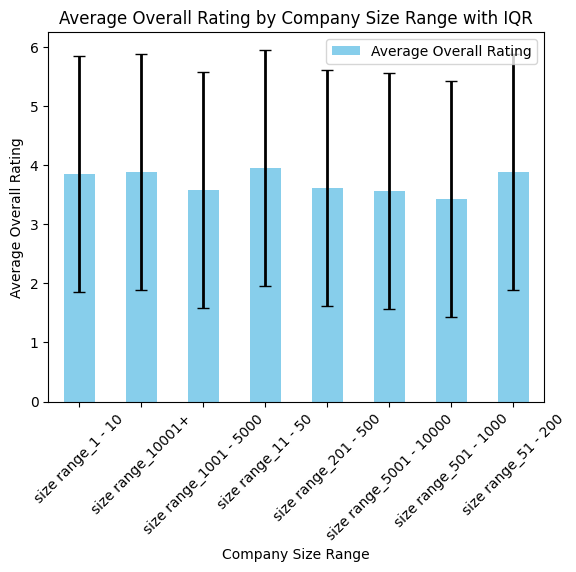

In [13]:
size_ranges = ['size range_1 - 10', 'size range_10001+', 'size range_1001 - 5000',
               'size range_11 - 50', 'size range_201 - 500', 'size range_5001 - 10000',
               'size range_501 - 1000', 'size range_51 - 200']

average_ratings = []
iqr_ratings = []

for size_range in size_ranges:
    mean = df[df[size_range] == 1]['overall_rating'].mean()
    iqr = df[df[size_range] == 1]['overall_rating'].quantile(0.75) - df[df[size_range] == 1]['overall_rating'].quantile(0.25)
    average_ratings.append(mean)
    iqr_ratings.append(iqr)

plot_data = pd.DataFrame({'Size Range': size_ranges, 'Average Rating': average_ratings, 'IQR': iqr_ratings})

plt.figure(figsize=(20, 20))
ax = plot_data.plot(kind='bar', x='Size Range', y='Average Rating', yerr='IQR', capsize=4,
                    color='skyblue', error_kw={'elinewidth':2, 'ecolor':'black'}, label='Average Overall Rating')
plt.xlabel('Company Size Range')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating by Company Size Range with IQR')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<Figure size 4000x1000 with 0 Axes>

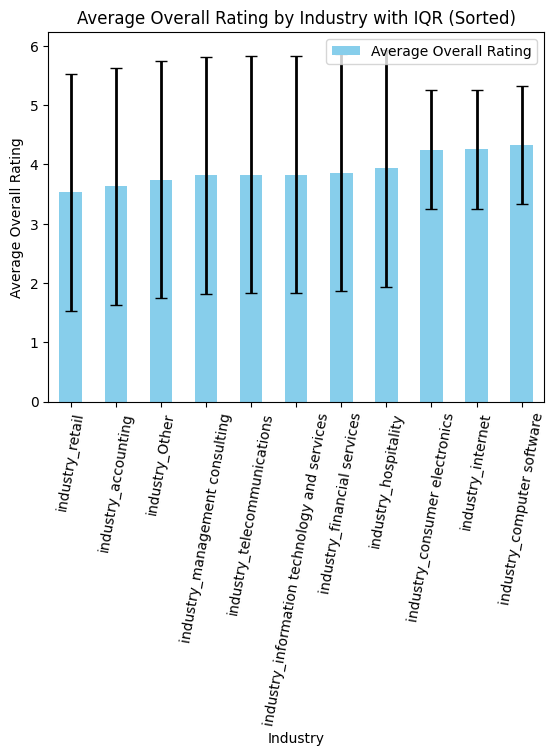

In [14]:
industries = ['industry_Other', 'industry_accounting', 'industry_computer software',
              'industry_consumer electronics', 'industry_financial services',
              'industry_hospitality', 'industry_information technology and services',
              'industry_internet', 'industry_management consulting',
              'industry_retail', 'industry_telecommunications']

average_ratings = []
iqr_ratings = []

for industry in industries:
    mean = df[df[industry] == 1]['overall_rating'].mean()
    iqr = df[df[industry] == 1]['overall_rating'].quantile(0.75) - df[df[industry] == 1]['overall_rating'].quantile(0.25)
    average_ratings.append(mean)
    iqr_ratings.append(iqr)


plot_data = pd.DataFrame({'Industry': industries, 'Average Rating': average_ratings, 'IQR': iqr_ratings})

plot_data_sorted = plot_data.sort_values(by='Average Rating')

plt.figure(figsize=(40, 10))  # Adjust the size as needed
ax = plot_data_sorted.plot(kind='bar', x='Industry', y='Average Rating', yerr='IQR', capsize=4,
                           color='skyblue', error_kw={'elinewidth':2, 'ecolor':'black'}, label='Average Overall Rating')
plt.xlabel('Industry')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating by Industry with IQR (Sorted)')
plt.xticks(rotation=80)
plt.legend()
plt.show()

**Keyword Analysis**

In [15]:
interesting_negative_words = ["micromanage", "blame", "unprofessional", "gossip", "disorganization", "favoritism", "insult"]
relev_cols = df[["overall_rating"] + interesting_negative_words]

neg_melted_df = pd.melt(relev_cols, id_vars=['overall_rating'], value_vars=interesting_negative_words)
neg_melted_df

overall_rating     variable  value
0                    2  micromanage  False
1                    1  micromanage  False
2                    4  micromanage  False
3                    3  micromanage  False
4                    1  micromanage  False
...                ...          ...    ...
870620               3       insult  False
870621               5       insult  False
870622               4       insult  False
870623               3       insult  False
870624               4       insult  False

[870625 rows x 3 columns]

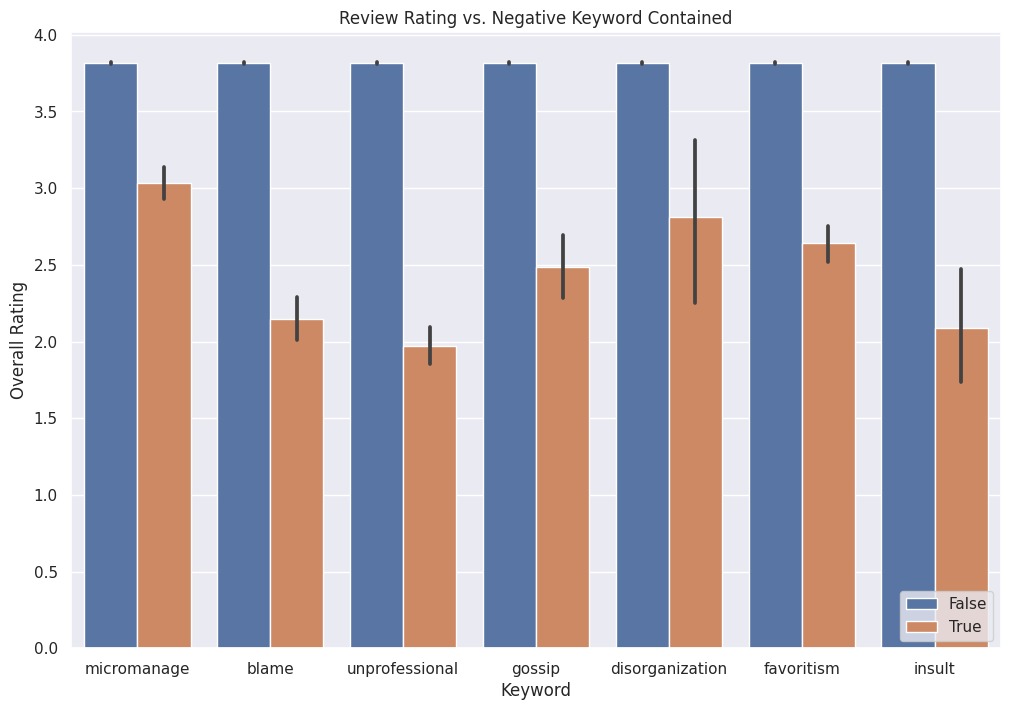

In [16]:
sns.set(rc={'figure.figsize':(12,8), 'figure.facecolor':(0,0,0,0)})
ax = sns.barplot(x="variable", y="overall_rating", hue="value", data=neg_melted_df)
plt.xlabel("Keyword")
plt.ylabel("Overall Rating")
plt.title("Review Rating vs. Negative Keyword Contained")
plt.legend(loc='lower right');

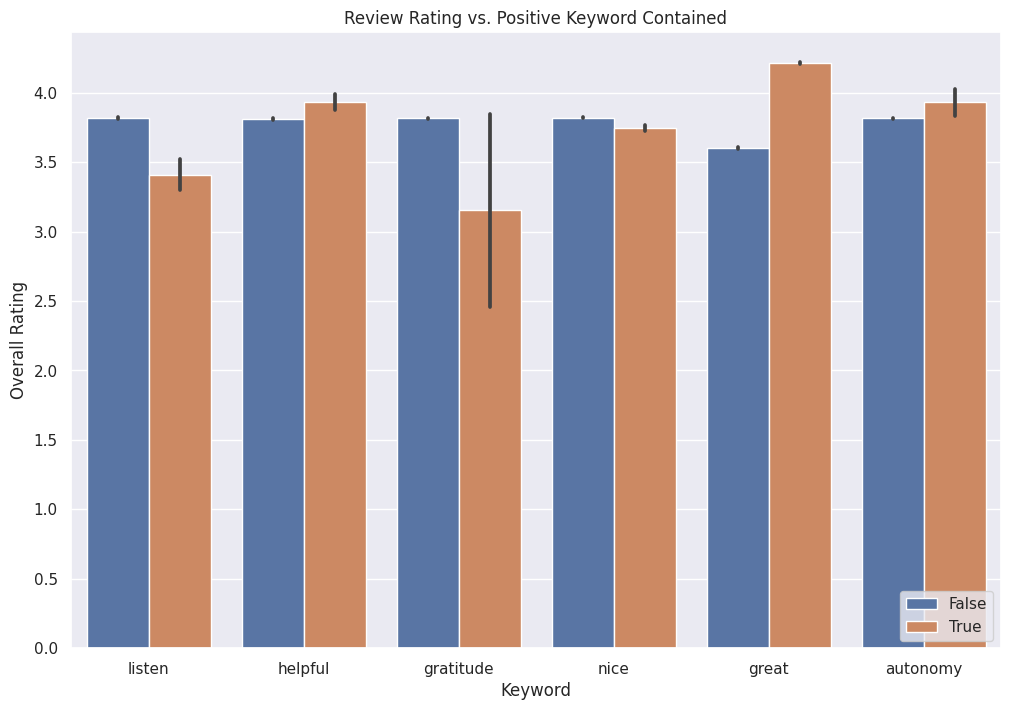

In [17]:
positive_words = ["listen", "helpful", "gratitude", "nice", "great", "autonomy"]

pos_relev_cols = df[["overall_rating"] + positive_words]
pos_melted_df = pd.melt(pos_relev_cols, id_vars=['overall_rating'], value_vars=positive_words)

sns.set(rc={'figure.figsize':(12,8), 'figure.facecolor':(0,0,0,0)})
ax = sns.barplot(x="variable", y="overall_rating", hue="value", data=pos_melted_df)
plt.xlabel("Keyword")
plt.ylabel("Overall Rating")
plt.title("Review Rating vs. Positive Keyword Contained")
plt.legend(loc='lower right');

**Vader Analysis**

Text(0, 0.5, "Polarity of 'Pros' Column")

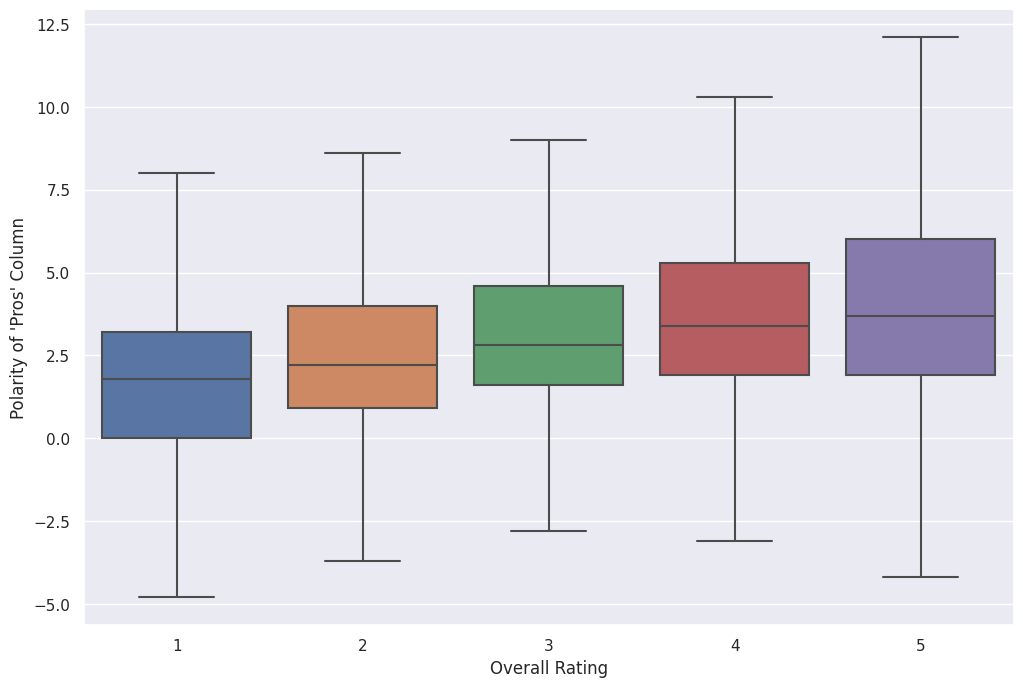

In [18]:
sns.boxplot(x= "overall_rating", y = "pros_polarity", data = df, showfliers = False)
plt.xlabel("Overall Rating")
plt.ylabel("Polarity of 'Pros' Column")

<Axes: xlabel='overall_rating', ylabel='cons_polarity'>

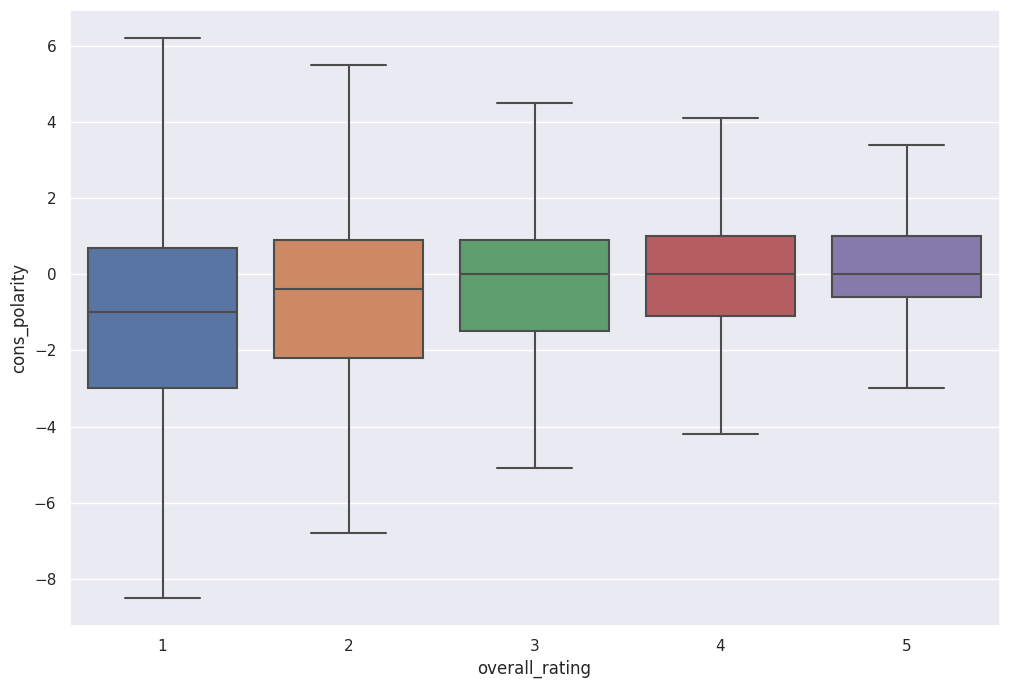

In [19]:
sns.boxplot(x= "overall_rating", y = "cons_polarity", data = df, showfliers = False)

<Axes: xlabel='overall_rating', ylabel='headline_polarity'>

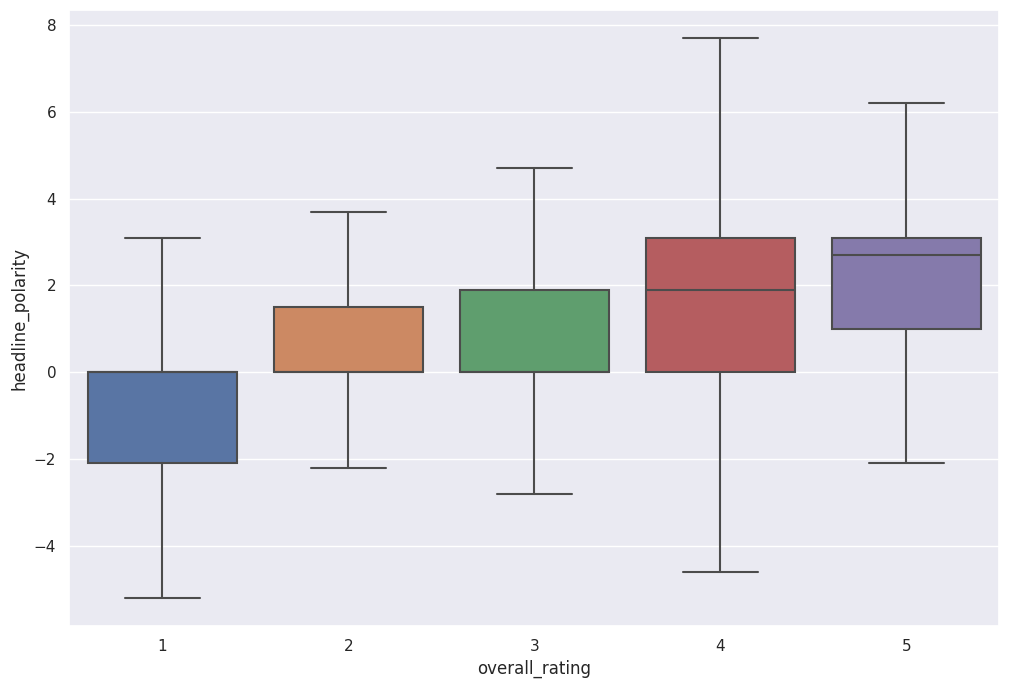

In [20]:
sns.boxplot(x= "overall_rating", y = "headline_polarity", data = df, showfliers = False)

# Model Creation and Testing
This includes the testing of any sort of models as well as parameter tuning

In [21]:
#split the df into an observed df and a hidden df

In [22]:
df.columns

Index(['firm', 'date_review', 'job_title', 'location', 'overall_rating',
       'work_life_balance', 'culture_values', 'diversity_inclusion',
       'career_opp', 'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv',
       'outlook', 'headline', 'pros', 'cons', 'headline_clean', 'pros_clean',
       'cons_clean', 'pros_polarity', 'cons_polarity', 'headline_polarity',
       'firm_normalized', 'Unnamed: 0', 'name', 'domain', 'year founded',
       'locality', 'linkedin url', 'current employee estimate',
       'total employee estimate', 'name_normalized', 'current employee',
       'former employee', 'years of experience', 'years of experience_1',
       'years of experience_10', 'years of experience_3',
       'years of experience_5', 'years of experience_8',
       'years of experience_null', 'micromanage', 'blame', 'unprofessional',
       'gossip', 'disorganization', 'favoritism', 'insult', 'listen',
       'helpful', 'gratitude', 'nice', 'great', 'autonomy', 'industry_Other',

Removed: 'firm', 'date_review', 'job_title', 'headline_clean', 'pros_clean',
       'cons_clean', 'Unnamed: 0', 'name', 'domain', 'year founded',
       'locality', 'linkedin url', 'current employee',
       'former employee',
       'total employee estimate', 'name_normalized',  'years of experience', 'firm_normalized'

In [23]:
features = ['work_life_balance', 'culture_values', 'diversity_inclusion',
       'career_opp', 'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv',
       'outlook', 'pros_polarity', 'cons_polarity', 'headline_polarity', 'years of experience_1',
       'years of experience_10', 'years of experience_3',
       'years of experience_5', 'years of experience_8',
       'years of experience_null', 'micromanage', 'blame', 'unprofessional',
       'gossip', 'disorganization', 'favoritism', 'insult', 'listen', 'helpful', 'gratitude', 'nice', 'great', 'autonomy', 'industry_Other',
       'industry_accounting', 'industry_computer software',
       'industry_consumer electronics', 'industry_financial services',
       'industry_hospitality', 'industry_information technology and services',
       'industry_internet', 'industry_management consulting',
       'industry_retail', 'industry_telecommunications', 'country_Other',
       'country_belgium', 'country_denmark', 'country_france',
       'country_germany', 'country_ireland', 'country_jordan',
       'country_netherlands', 'country_switzerland', 'country_united kingdom',
       'country_united states', 'size range_1 - 10', 'size range_10001+',
       'size range_1001 - 5000', 'size range_11 - 50', 'size range_201 - 500',
       'size range_5001 - 10000', 'size range_501 - 1000',
       'size range_51 - 200']

In [24]:
X = df[features]  # Features
y = df['overall_rating']  # Target

X_train, X_test, Y_train, Y_test = train_test_split(df[features], df['overall_rating'], test_size=0.3, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [25]:
X

work_life_balance  culture_values  diversity_inclusion  career_opp  \
0                       1               3                  1.0           1   
1                       3               1                  2.0           1   
2                       3               3                  4.0           4   
3                       5               5                  4.0           3   
4                       5               1                  2.0           1   
...                   ...             ...                  ...         ...   
124370                  4               4                  5.0           4   
124371                  5               5                  5.0           5   
124372                  4               3                  3.0           3   
124373                  3               1                  1.0           1   
124374                  3               3                  3.0           3   

        comp_benefits  senior_mgmt  recommend  ceo_approv  outlook  \
0                   2            2         -1         0.0     -1.0   
1                   1            1         -1         0.0      0.0   
2                   4            2          1         0.0      1.0   
3                   1            2         -1         0.0      1.0   
4                   2            1         -1         0.0      0.5   
...               ...          ...        ...         ...      ...   
124370              2            1          1         1.0      0.5   
124371              5            5          1         1.0      1.0   
124372              4            2          1         1.0      1.0   
124373              2            2         -1         0.5      0.5   
124374              3            3          1         0.5      1.0   

        pros_polarity  ...  country_united kingdom  country_united states  \
0                 7.5  ...                       1                      0   
1                 2.8  ...                       1                      0   
2                 2.7  ...                       1                      0   
3                 5.0  ...                       1                      0   
4                 4.9  ...                       1                      0   
...               ...  ...                     ...                    ...   
124370            3.8  ...                       0                      0   
124371            1.6  ...                       0                      0   
124372            6.8  ...                       0                      0   
124373            2.3  ...                       0                      0   
124374            5.5  ...                       0                      0   

        size range_1 - 10  size range_10001+  size range_1001 - 5000  \
0                       0                  0                       0   
1                       0                  0                       0   
2                       0                  0                       0   
3                       0                  0                       0   
4                       0                  0                       0   
...                   ...                ...                     ...   
124370                  0                  0                       0   
124371                  0                  0                       0   
124372                  0                  0                       0   
124373                  0                  0                       0   
124374                  0                  0                       0   

        size range_11 - 50  size range_201 - 500  size range_5001 - 10000  \
0                        0                     1                        0   
1                        0                     1                        0   
2                        0                     1                        0   
3                        0                     1                        0   
4                        0                     1       

*Testing to find the best Model*

**Logistic Regression**

In [26]:
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(X_train, Y_train)
acc = round(logreg.score(X_val, Y_val) * 100, 2)
print(acc)

60.83


**K Nearest Neighbor**

In [ ]:
parameter_space_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, parameter_space_knn, n_jobs=-1, cv=3)
grid_search_knn.fit(X_train, Y_train)

print("Best parameters found for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
validation_accuracy = round(best_knn.score(X_val, Y_val) * 100, 2)
print(f'Validation Accuracy: {validation_accuracy}%')

Best parameters found for KNN: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [28]:
knn = KNeighborsClassifier(metric = 'manhattan',
                           n_neighbors = 15,
                           weights = 'distance')
knn.fit(X_train, Y_train)
acc = round(knn.score(X_val, Y_val) * 100, 2)
print(acc)

66.14


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameter_space_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(decision_tree, parameter_space_dt, n_jobs=-1, cv=3)
grid_search_dt.fit(X_train, Y_train)

print("Best parameters found for Decision Tree:", grid_search_dt.best_params_)

Best parameters found for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [29]:
decisiontree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=10,
    random_state=42
)
decisiontree.fit(X_train, Y_train)
acc = round(decisiontree.score(X_val, Y_val) * 100, 2)
print(acc)

65.31


**Random Forest**

In [ ]:
parameter_space_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_forest = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(random_forest, parameter_space_rf, n_jobs=-1, cv=3)
grid_search_rf.fit(X_train, Y_train)

print("Best parameters found for Random Forest:", grid_search_rf.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found for Random Forest: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [30]:
random_forest = RandomForestClassifier(max_depth = None,
                                       max_features = 'auto',
                                       min_samples_leaf = 1,
                                       min_samples_split = 5,
                                       n_estimators = 200,
                                       random_state=42)
random_forest.fit(X_train, Y_train)
acc = round(random_forest.score(X_val, Y_val) * 100, 2)
print(acc)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


68.39


**Neural Network**


In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs']
}

clf = MLPClassifier(random_state=42)
grid_search = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3)
grid_search.fit(X_train, Y_train)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'}


In [31]:
clf = MLPClassifier(hidden_layer_sizes=(50,),
                    activation= 'relu',
                    solver="adam",
                    random_state=42)
clf.fit(X_train, Y_train)
acc = clf.score(X_val, Y_val)
print(acc)

0.6647906736346408


# Model Selection and Analysis

**Random Forest Exploration**

In [32]:
print(f"Validation Accuracy: {round(random_forest.score(X_val, Y_val) * 100, 2)}")
print(f"Test Accuracy: {round(random_forest.score(X_test, Y_test) * 100, 2)}")
print(f"Cross Validation Train Score: {cross_val_score(random_forest, X_val, Y_val, cv=5).mean()}")
print(f"Cross Validation Test Score: {cross_val_score(random_forest, X_test, Y_test, cv=5).mean()}")

Validation Accuracy: 68.39
Test Accuracy: 68.58


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Cross Validation Train Score: 0.6686381691791574


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Cross Validation Test Score: 0.6771098142958671


Feature Importances:
            Feature  Importance
5       senior_mgmt    0.110265
1    culture_values    0.102996
3        career_opp    0.093241
4     comp_benefits    0.074170
9     pros_polarity    0.066833
..              ...         ...
19            blame    0.000435
21           gossip    0.000286
24           insult    0.000081
22  disorganization    0.000065
27        gratitude    0.000026

[61 rows x 2 columns]


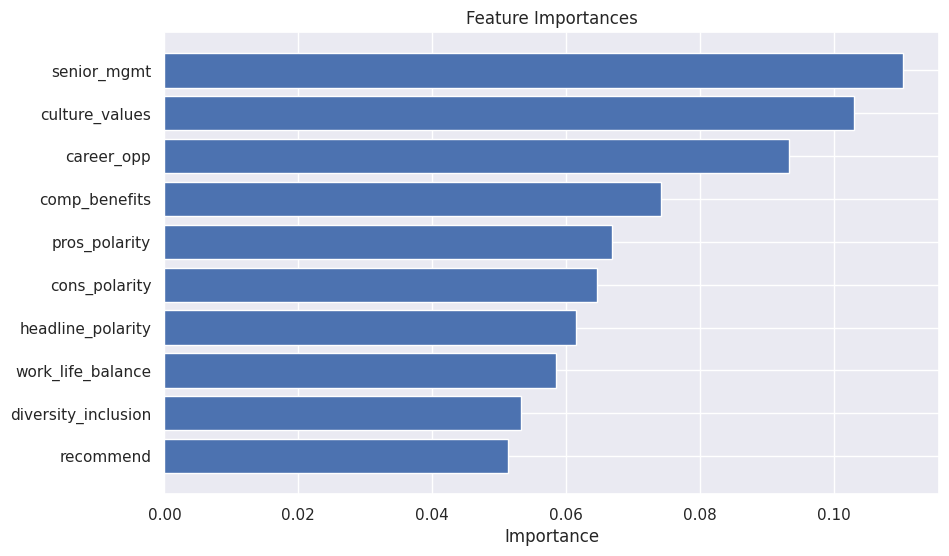

In [33]:
feature_importances = random_forest.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

top_features = feature_importance_df.head(10).sort_values(by = 'Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

**Decision Tree Exploration**

In [34]:
print(f"Validation Accuracy: {round(decisiontree.score(X_val, Y_val) * 100, 2)}%")
print(f"Test Accuracy: {round(decisiontree.score(X_test, Y_test) * 100, 2)}%")
print(f"Cross Validation Train Score: {cross_val_score(decisiontree, X_train, Y_train, cv=5).mean() * 100:.2f}%")
print(f"Cross Validation Validation Score: {cross_val_score(decisiontree, X_val, Y_val, cv=5).mean() * 100:.2f}%")

Validation Accuracy: 65.31%
Test Accuracy: 65.51%
Cross Validation Train Score: 65.17%
Cross Validation Validation Score: 62.67%


In [35]:
from collections import Counter, defaultdict
from itertools import combinations
import pandas as pd
import numpy as np
import operator
import math
import itertools
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing, tree
import matplotlib.pyplot as plt

In [36]:
clf = decisiontree
feature_name = features # fix this
fig, ax = plt.subplots(figsize=(100, 100))
tree.plot_tree(clf, fontsize=10, class_names=True);

In [37]:
new_decisiontree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth= 4,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
new_features = ['culture_values', 'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv', 'outlook']
new_X_train = X_train[new_features]

new_decisiontree.fit(new_X_train, Y_train)
acc = round(new_decisiontree.score(X_val[['culture_values', 'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv', 'outlook']], Y_val) * 100, 2)
print(acc)

63.09


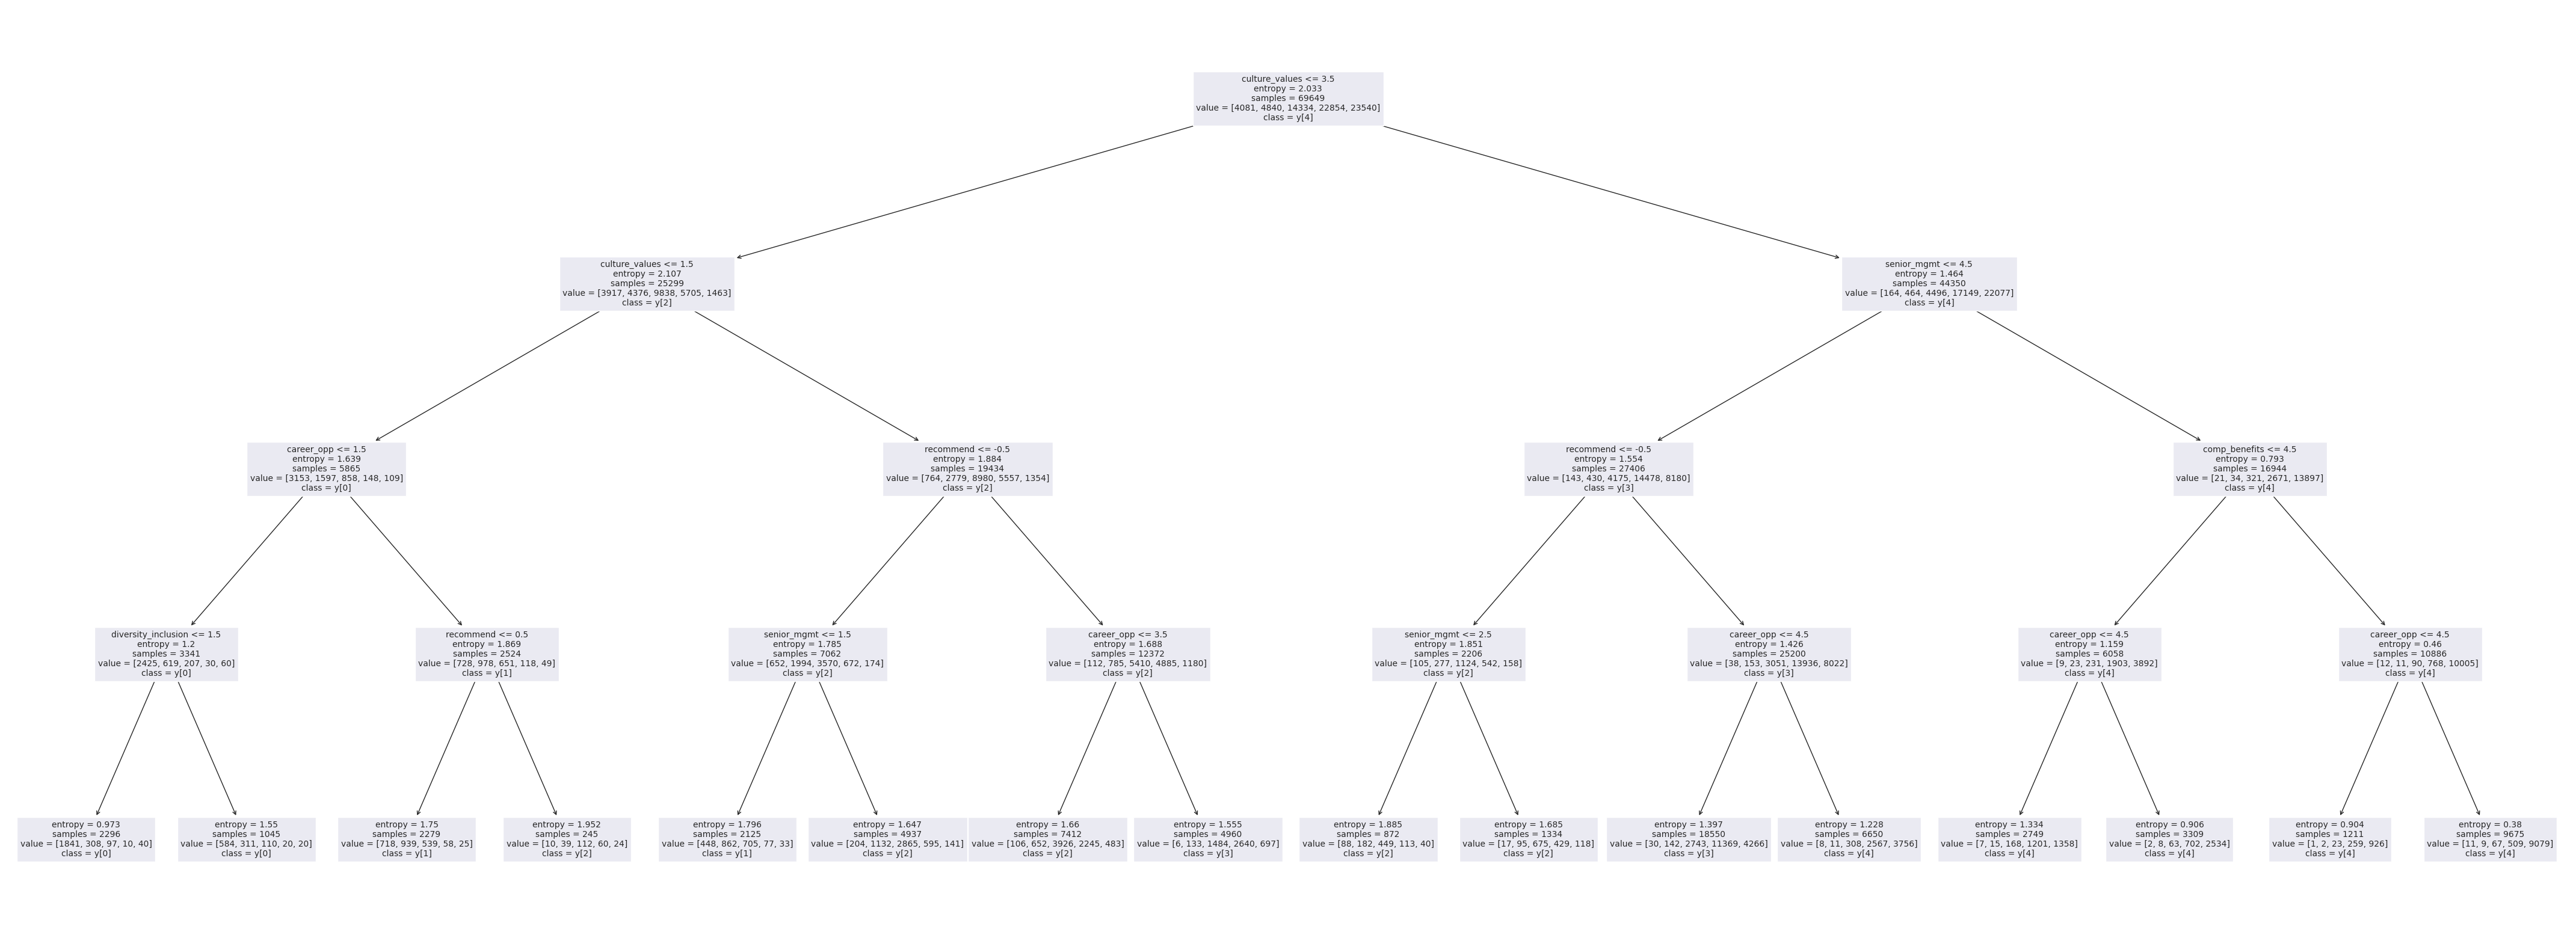

In [41]:
feature_names = new_features
clf = new_decisiontree
fig, ax = plt.subplots(figsize=(55, 20))
tree.plot_tree(clf, feature_names=feature_names, fontsize=10, class_names=True)
plt.show()